# Objetivos

In [ ]:
# Entender como funciona a coleta de dados de páginas web (web scraping)
# Entender a metodologia de projeto de machine learning
# Entender os principais conceitos sobre machine learning (regressão)
# Desenvolver códigos para coleta, tratamento, análises de dados e algoritmos
# Entender a capacidade analítica
# Entender como o projeto é desenvolvido no dia-dia

# Aula 1

In [ ]:
# Extração de dados da web
# Processo de coleta dos dados de páginas web de forma automatizada (ou semi automatizada)
# Estes dados coletados da internet são armaznados de forma estruturada ou semi-estruturada
# A coleta dos dados são utilizados para diferentes objetivos como: monitoramento de preço,
# coleta de notócias, dados do mercado financeiro, campanhas publicitárias e etc...

In [ ]:
# Estrutura da página html:

# O scraping acessa os dados das páginas através dos elementos (seletores) HTML disponíveis
# Os mais comuns e fáceis de acessar são o id e class

In [ ]:
# Como acessar o código fonte da página?

# Botão direito -> inspect

# Ou em "view page source" -> pode não apresentar tudo o que queremos

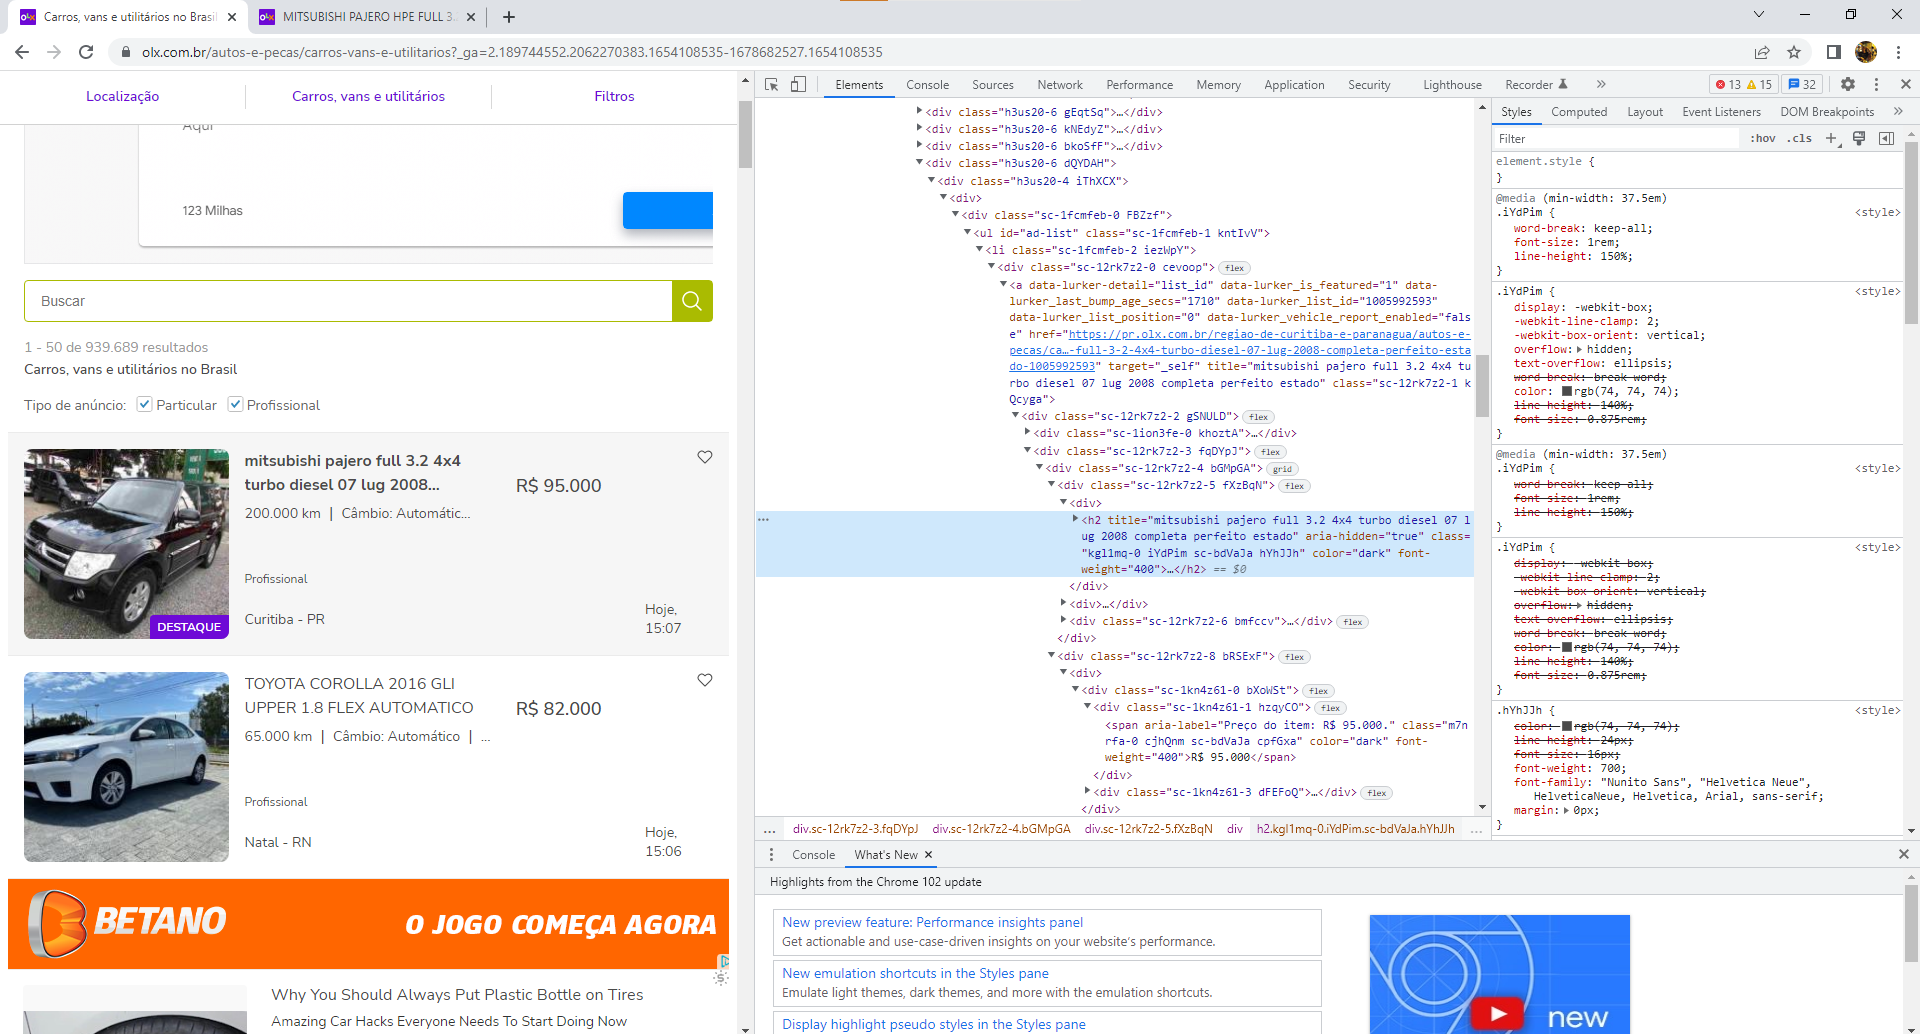

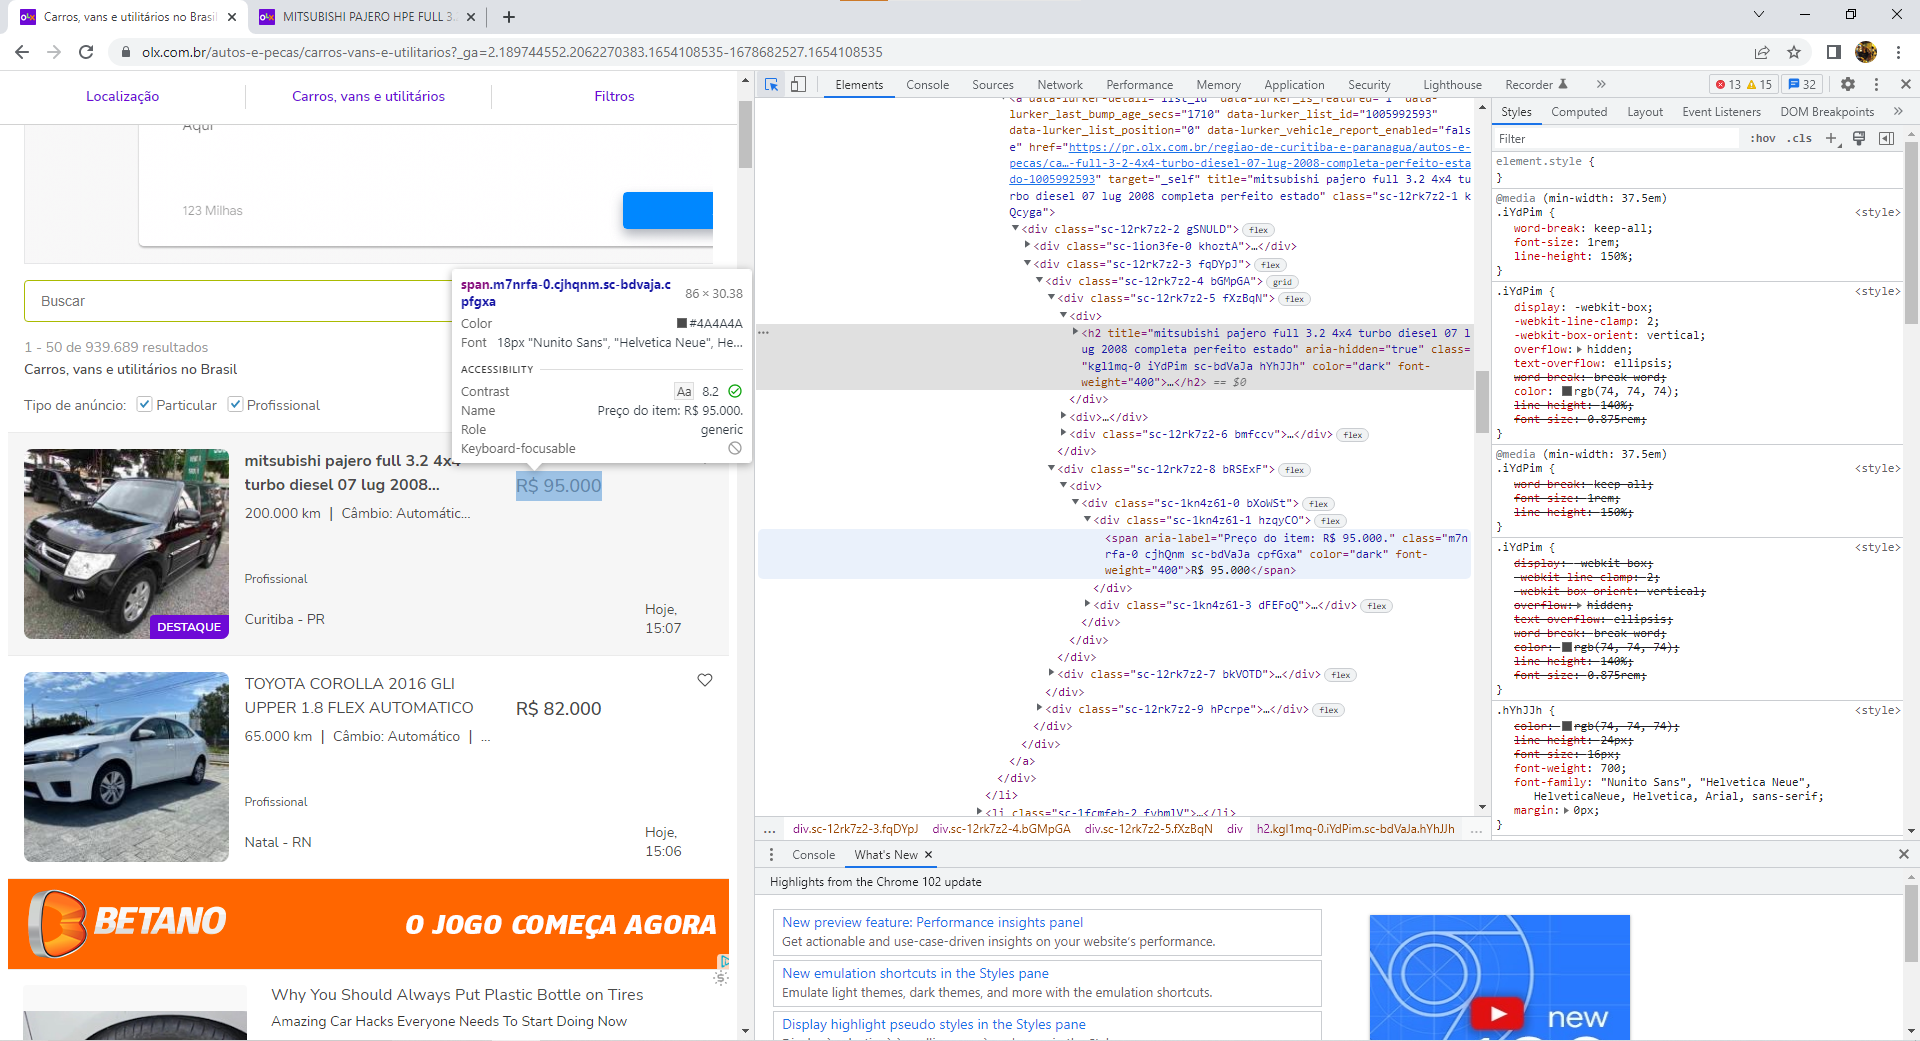

In [ ]:
# Passando o mouse sobre o título e o preço, será mostrado na aba de inspect o que queremos.

# PS: Ids's são únicos. Mas classes geralmente não o são.
# Esse é o trabalho manual do web-scrapping: identificar que elementos queremos.

In [ ]:
# Alguns pacotes que utilizaremos:

# Scrapy: mais profissional e dificil de usar
# Selenium Python: útil quando se tem gráficos
# BeautifulSoup: trabalha junto do selenium, acessa a página e puxa o objeto de interesse

# Pra r existem pacotes análogos

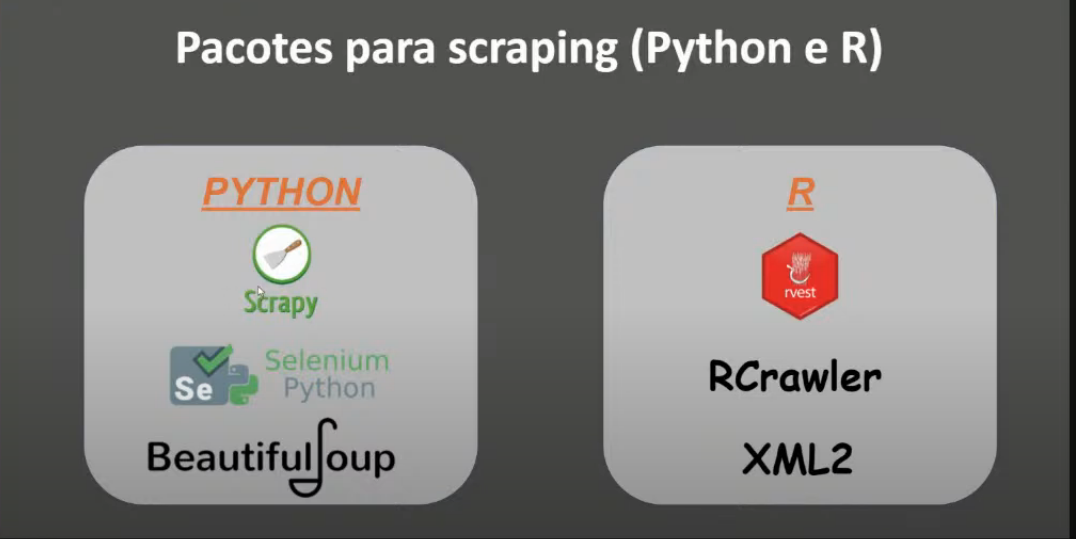

In [ ]:
# Extraíremos os dados do site:

https://www.olx.com.br/autos-e-pecas/carros-vans-e-utilitarios?o=1

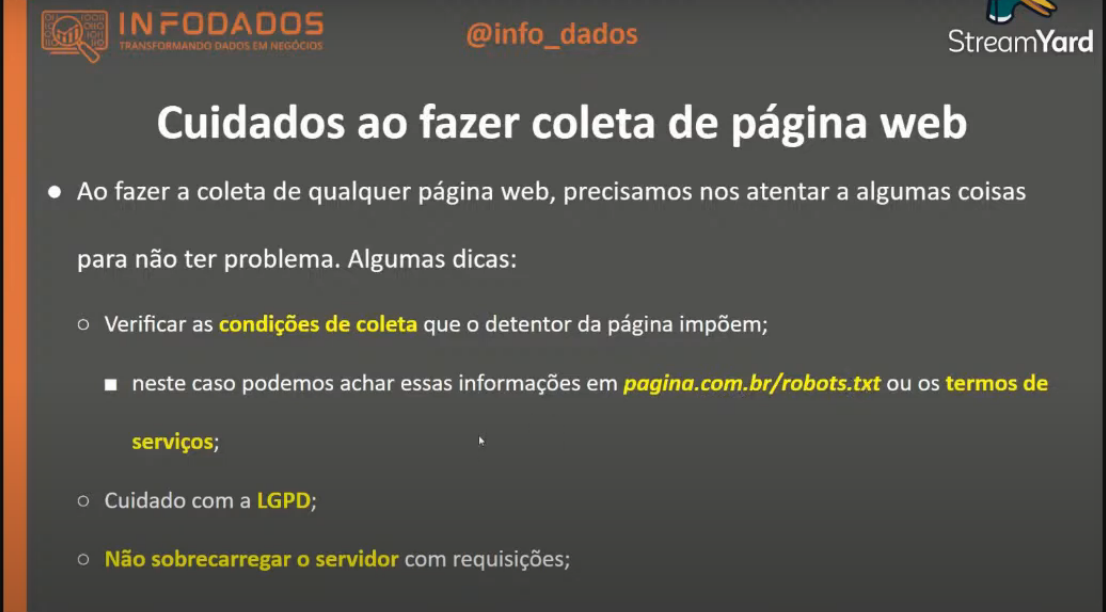

In [2]:
# Dica: ao puxar os dados colocar sleeps para simular realmente uma pessoa acessando o site

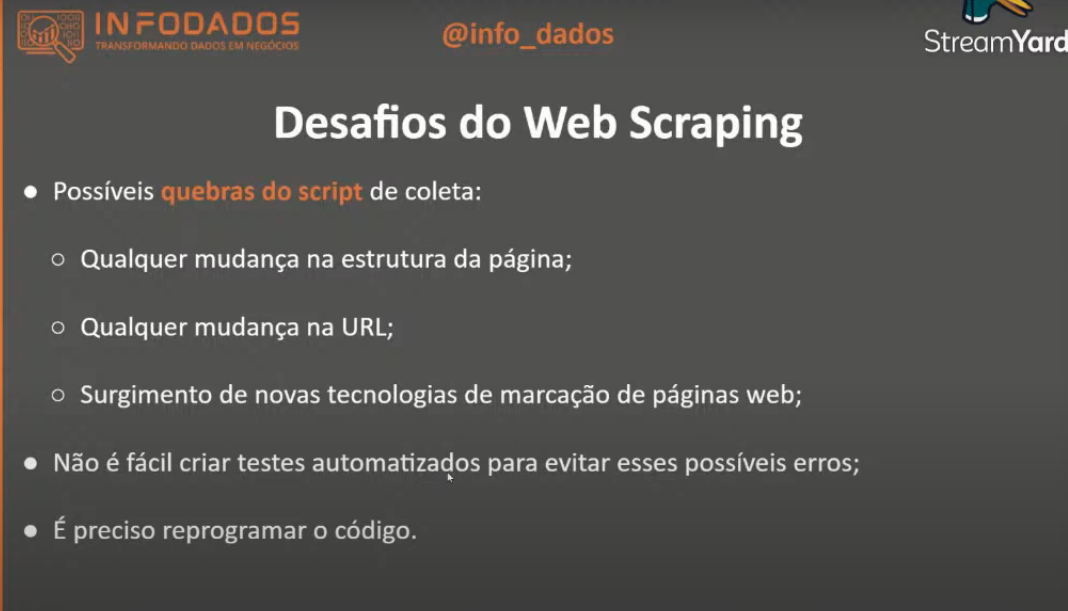

# Web Scrapping

## Pacotes

In [6]:
from bs4 import BeautifulSoup
import requests
import time
import random
import pandas as pd
from datetime import datetime

## Capturando a página

In [8]:
url_inicial = 'https://www.olx.com.br/autos-e-pecas/carros-vans-e-utilitarios?o=1'
pagina_inicial = requests.get(url_inicial)
print(pagina_inicial)

# se a resposta for 200 OK - qualquer outro valor aconteceu algum problema
# no nosso caso deu 403 -> acesso bloqueado
# como contornar isso? no caso da OLX precisamos especificar de que navegador estamos tentando acessar
# o nome disso é header. Então criando um, conseguiremos acessar

<Response [403]>


In [9]:
headers = {
    'User-Agent': "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36",
}

url_inicial = 'https://www.olx.com.br/autos-e-pecas/carros-vans-e-utilitarios?o=1'
pagina_inicial = requests.get(url_inicial,headers = headers)
print(pagina_inicial)

# agora deu certo

<Response [200]>


In [13]:
type(pagina_inicial.content) 
# precisamos converter o tipo de arquivo para que seja possível o BS ler.

bytes

In [14]:
pagina_inicial = BeautifulSoup(pagina_inicial.content, 'html.parser')
print(type(pagina_inicial))

<class 'bs4.BeautifulSoup'>


## Acessando e extraindo elementos da página

In [15]:
print(pagina_inicial.prettify())
# note que agora aparece de forma similar ao inspect e é daí que vamos extrair os dados

<html data-reactroot="" lang="pt-BR">
 <head>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no" name="viewport"/>
  <meta content="abuy-list-item-fair-badge_orange.adv-adagio_enabled.adv-adview-lazyload_enabled.adv-afs_search.adv-bad-bidders_disabled.adv-billboard_enabled.adv-gemini_enabled.adv-has-adblocker_enabled.adv-insureads_enabled.adv-listing-afsh-native_enabled.adv-listing-afsh_enabled.adv-magnite-listing_enabled.adv-monitoring_enabled.adv-seasonal_control.bj-transactional-info_enabled.dispute-form-improved_A.nu-experiment-test_show.nubanner-web_show.olx-central-header_enabled.txp-chat-negotiation-buyers_control.txp-chat-negotiation-sellers_control.vx-tag-listing_active" name="x-testab-debugger"/>
  <meta content="#6e0ad6" name="theme-color"/>
  <meta content="yes" name="apple-mobile-web-app-capable"/>
  <meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
  <link href="https://olx.com.br/busca?cg=2020&amp;w=3" 

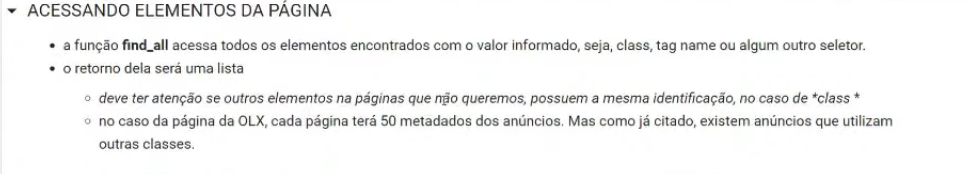

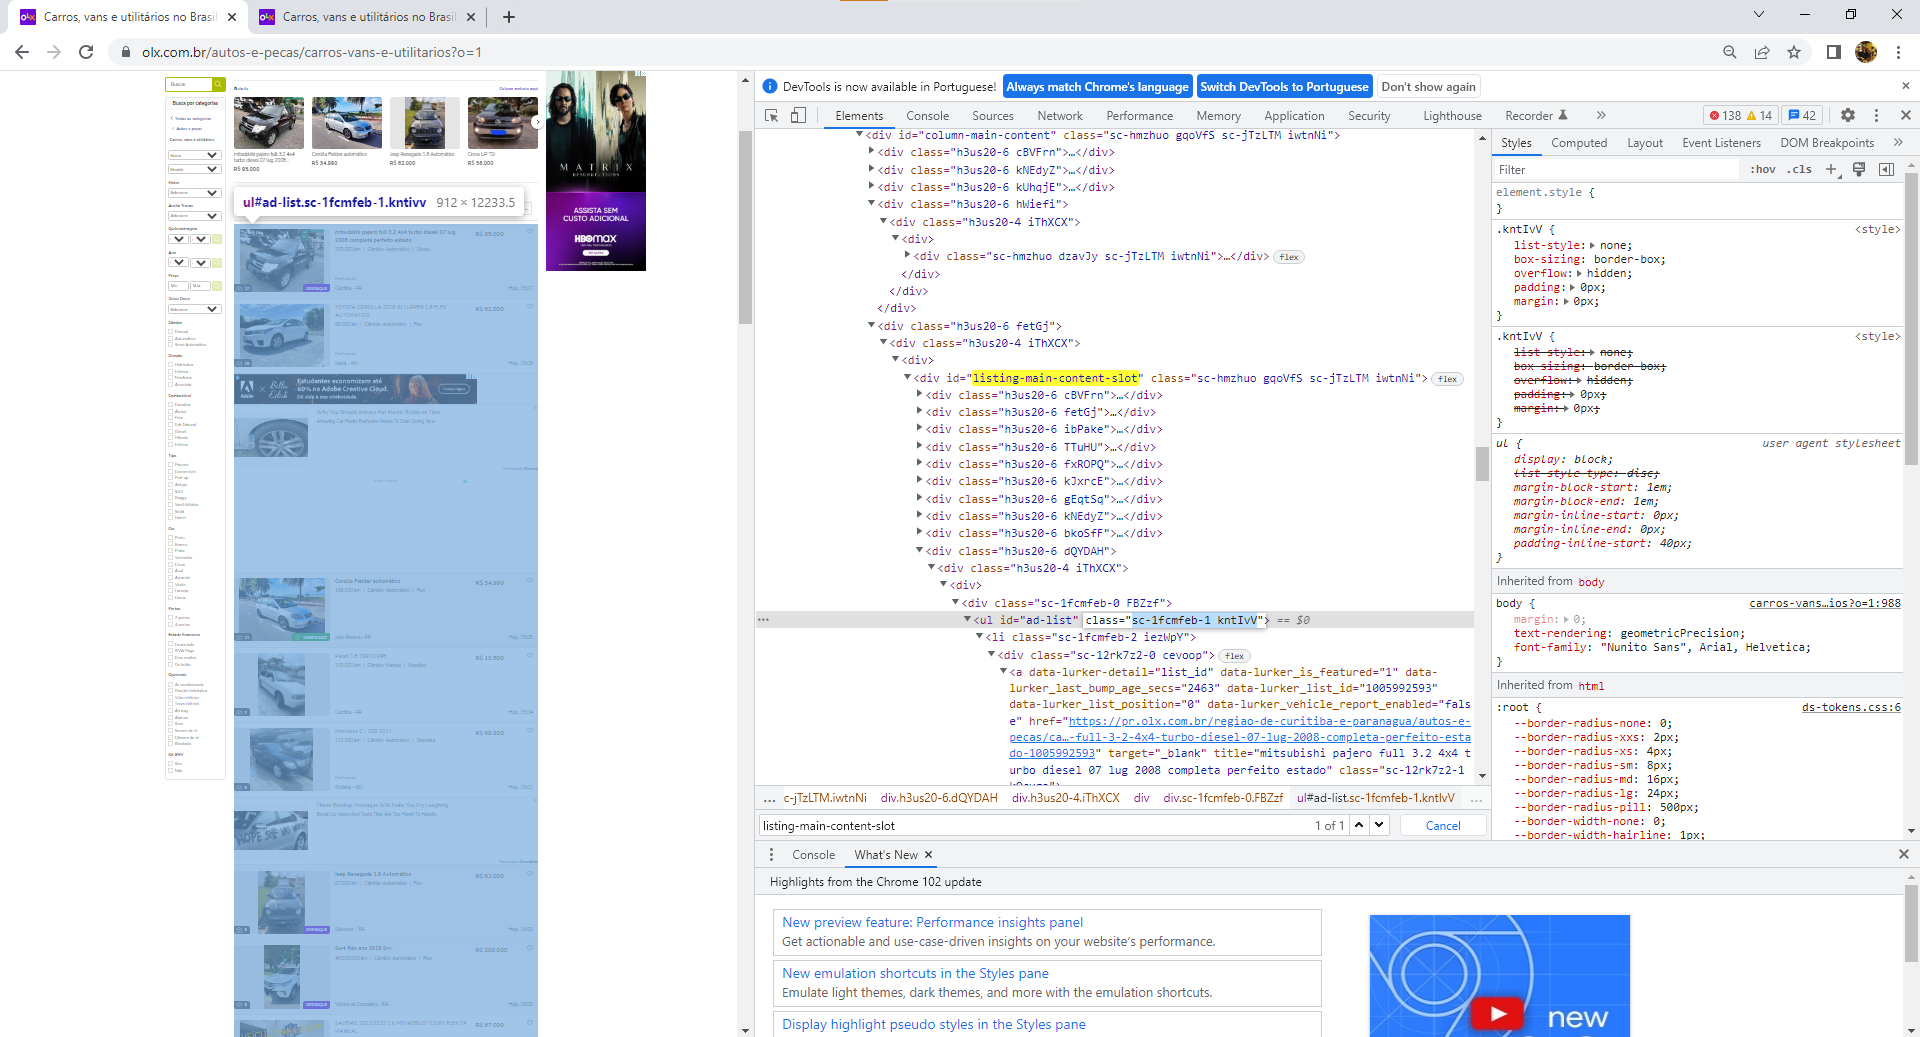

In [22]:
# Extraindo vários anúncios:

# Precisamos identificar a class que pega todos os anúncios, que é o que fazemos acima (note que 
# todos os anúncios foram selecionados ao passar o mouse em cima da classe específica)

anuncios = pagina_inicial.find_all(class_="sc-1fcmfeb-1 kntIvV")
#anuncios[:5]

# Mas ainda tá retornando em html. Precisamos converter para texto

In [23]:
## Convertendo anúncios para texto
[x.get_text() for x in anuncios][:5]

['17DESTAQUEmitsubishi pajero full 3.2 4x4 turbo diesel 07 lug 2008 completa perfeito estado200.000 km\xa0\xa0|\xa0\xa0Câmbio: Automático\xa0\xa0|\xa0\xa0Diesel\xa0\xa0|\xa0\xa0R$ 95.000ProfissionalCuritiba -  PRHoje, 15:0718TOYOTA COROLLA 2016 GLI UPPER 1.8 FLEX AUTOMATICO65.000 km\xa0\xa0|\xa0\xa0Câmbio: Automático\xa0\xa0|\xa0\xa0Flex\xa0\xa0|\xa0\xa0R$ 82.000ProfissionalNatal -  RNHoje, 15:0611VERIFICADOCorolla Fielder automático 169.000 km\xa0\xa0|\xa0\xa0Câmbio: Automático\xa0\xa0|\xa0\xa0Flex\xa0\xa0|\xa0\xa0R$ 34.990João Pessoa -  PBHoje, 15:057Parati 1.8 1997/1998170.000 km\xa0\xa0|\xa0\xa0Câmbio: Manual\xa0\xa0|\xa0\xa0Gasolina\xa0\xa0|\xa0\xa0R$ 10.500Curitiba -  PRHoje, 15:045Mercedes C - 200 2011110.000 km\xa0\xa0|\xa0\xa0Câmbio: Automático\xa0\xa0|\xa0\xa0Gasolina\xa0\xa0|\xa0\xa0R$ 69.900OnlineProfissionalGoiânia -  GOHoje, 15:016DESTAQUEJeep Renegade 1.8 Automático67.000 km\xa0\xa0|\xa0\xa0Câmbio: Automático\xa0\xa0|\xa0\xa0Flex\xa0\xa0|\xa0\xa0R$ 62.000Salvador -  BAHo

In [ ]:
# PS: O site da OLX é muito dinâmico então é normal as vezes os anuncios do print acima não 
# baterem com o do site que utilizamos inicialmente

In [21]:
# Extraindo títulos dos anúncios
titulos = pagina_inicial.find_all(class_="kgl1mq-0 iYdPim sc-bdVaJa hYhJJh")
#titulos[:5]

[<h2 aria-hidden="true" class="kgl1mq-0 iYdPim sc-bdVaJa hYhJJh" color="dark" font-weight="400" title="mitsubishi pajero full 3.2 4x4 turbo diesel 07 lug 2008 completa perfeito estado">mitsubishi pajero full 3.2 4x4 turbo diesel 07 lug 2008 completa perfeito estado</h2>,
 <h2 aria-hidden="true" class="kgl1mq-0 iYdPim sc-bdVaJa hYhJJh" color="dark" font-weight="400" title="Corolla Fielder automático ">Corolla Fielder automático </h2>,
 <h2 aria-hidden="true" class="kgl1mq-0 iYdPim sc-bdVaJa hYhJJh" color="dark" font-weight="400" title="Jeep Renegade 1.8 Automático">Jeep Renegade 1.8 Automático</h2>,
 <h2 aria-hidden="true" class="kgl1mq-0 iYdPim sc-bdVaJa hYhJJh" color="dark" font-weight="400" title="Sw4 flex ano 2019 Srv .">Sw4 flex ano 2019 Srv .</h2>,
 <h2 aria-hidden="true" class="kgl1mq-0 iYdPim sc-bdVaJa hYhJJh" color="dark" font-weight="400" title="Strada 2020/20">Strada 2020/20</h2>]

In [25]:
# Extraindo textos do títulos (convertendo para html para texto)
titulos = [x.get_text() for x in titulos]
titulos[:5]

['mitsubishi pajero full 3.2 4x4 turbo diesel 07 lug 2008 completa perfeito estado',
 'Corolla Fielder automático ',
 'Jeep Renegade 1.8 Automático',
 'Sw4 flex ano 2019 Srv .',
 'Strada 2020/20']

In [66]:
# Extração completa:

# Extraindo e convertendo ID:
id = pagina_inicial.find_all(class_="sc-12rk7z2-1 kQcyga")
ids = [x.get_attribute_list("data-lurker_list_id")[0] for x in id]

# Extraindo e convertendo LINK do anúncio:
tags_links=pagina_inicial.find_all(name="a", class_="sc-12rk7z2-1 kQcyga")
links = [x.get_attribute_list("href")[0] for x in tags_links]

# Extraindo título e convertendo:
titulo = pagina_inicial.find_all(class_="kgl1mq-0")
titulo = [x.get_text() for x in titulo]

# Extraindo valor
valor = pagina_inicial.find_all(class_="m7nrfa-0 cjhQnm sc-bdVaJa cpfGxa")
valor = [x.get_text() for x in valor]

# Extraindo data do anúncio
data = pagina_inicial.find_all(class_="sc-11h4wdr-0 cHSTFT sc-bdVaJa bxVNCd")
data = [x.get_text() for x in data]

# Extraindo do infos do anuncio
infos = pagina_inicial.find_all(class_="sc-1ftm7qz-2 ilPFvN")
infos = [x.get_text() for x in infos]

# Extraindo localização dos anuncios
local = pagina_inicial.find_all(class_="sc-1c3ysll-1 flPYFW sc-bdVaJa bxVNCd")
local = [x.get_text() for x in local]

In [68]:
# Verificando a quantidade de elementos para cada variável:

len(ids),len(links),len(titulos),len(infos),len(valor),len(local),len(data)

(50, 50, 50, 50, 50, 50, 50)

In [69]:
# Visualizando anúncio completo nas variáveis
i=0
ids[i],links[i],titulos[i],infos[i],valor[i],local[i],data[i]

('1005992593',
 'https://pr.olx.com.br/regiao-de-curitiba-e-paranagua/autos-e-pecas/carros-vans-e-utilitarios/mitsubishi-pajero-full-3-2-4x4-turbo-diesel-07-lug-2008-completa-perfeito-estado-1005992593',
 'mitsubishi pajero full 3.2 4x4 turbo diesel 07 lug 2008 completa perfeito estado',
 '200.000 km\xa0\xa0|\xa0\xa0Câmbio: Automático\xa0\xa0|\xa0\xa0Diesel\xa0\xa0|\xa0\xa0',
 'R$ 95.000',
 'Curitiba -  PR',
 'Hoje, 15:07')

## Estruturando dados em um dataframe:

In [74]:
# Criando um dataframe com os anuncios

df = pd.DataFrame(list(zip(ids,titulo,infos,valor,local,data,links)),
                  columns=["id","titulo","infos","valor","local","data_anuncio","link"])
df.head()

id                                             titulo  \
0  1005992593  mitsubishi pajero full 3.2 4x4 turbo diesel 07...   
1  1025930361  TOYOTA COROLLA 2016 GLI UPPER 1.8 FLEX AUTOMATICO   
2  1035426049                        Corolla Fielder automático    
3  1009512245                               Parati 1.8 1997/1998   
4  1014938551                              Mercedes C - 200 2011   

                                               infos      valor  \
0  200.000 km  |  Câmbio: Automático  |  Diesel  |    R$ 95.000   
1     65.000 km  |  Câmbio: Automático  |  Flex  |    R$ 82.000   
2    169.000 km  |  Câmbio: Automático  |  Flex  |    R$ 34.990   
3    170.000 km  |  Câmbio: Manual  |  Gasolina  |    R$ 10.500   
4  110.000 km  |  Câmbio: Automático  |  Gasolina...  R$ 69.900   

               local data_anuncio  \
0     Curitiba -  PR  Hoje, 15:07   
1        Natal -  RN  Hoje, 15:06   
2  João Pessoa -  PB  Hoje, 15:05   
3     Curitiba -  PR  Hoje, 15:04   
4      Goiânia -  GO  Hoje, 15:01   

                                                link  
0  https://pr.olx.com.br/regiao-de-curitiba-e-par...  
1  https://rn.olx.com.br/rio-grande-do-norte/auto...  
2  https://pb.olx.com.br/paraiba/autos-e-pecas/ca...  
3  https://pr.olx.com.br/regiao-de-curitiba-e-par...  
4  https://go.olx.com.br/grande-goiania-e-anapoli...

In [75]:
# Salvando os dados
dataHora = datetime.now().strftime('%Y%m%d%H%M')
print(dataHora)
df.to_csv(f"metadados_olx_{dataHora}.csv",index=False)

202206011726


## Automatizando coleta dos dados

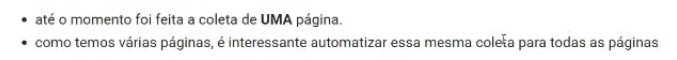

In [ ]:
# Como percorrer as páginas?

# Nesse nosso caso é simples porque quando mudamos de página o único parâmetro que muda é "o=i"
# onde i é o número da página tal que i>0
# então é só criar um loop dentro de um for.

In [91]:
%%time
## DATAFRAME FINAL COM OS DADOS
df_metadados = pd.DataFrame()

## DATA QUE A COLETA FOI REALIZADA. SERÁ UTILIZADA PARA TER UM CONTROLE DE TEMPO DOS DADOS 
data_coleta = datetime.now().date()

headers = {
    'User-Agent': "Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/27.0.1453.93 Safari/537.36",
}

print(f"=====Coleta Iniciada=====")
for pagina in range(1,100):

    url_inicial = f"https://www.olx.com.br/autos-e-pecas/carros-vans-e-utilitarios?o={pagina}"
    pagina_inicial = requests.get(url_inicial, headers = headers)
    print(pagina_inicial)
    
    pagina_inicial = BeautifulSoup(pagina_inicial.content,'html.parser')

    # Extraindo e convertendo ID:
    id = pagina_inicial.find_all(class_="sc-12rk7z2-1 kQcyga")
    ids = [x.get_attribute_list("data-lurker_list_id")[0] for x in id]

    # Extraindo e convertendo LINK do anúncio:
    tags_links=pagina_inicial.find_all(name="a", class_="sc-12rk7z2-1 kQcyga")
    links = [x.get_attribute_list("href")[0] for x in tags_links]

    # Extraindo título e convertendo:
    titulo = pagina_inicial.find_all(class_="kgl1mq-0")
    titulo = [x.get_text() for x in titulo]

    # Extraindo valor
    valor = pagina_inicial.find_all(class_="m7nrfa-0 cjhQnm sc-bdVaJa cpfGxa")
    valor = [x.get_text() for x in valor]

    # Extraindo data do anúncio
    data = pagina_inicial.find_all(class_="sc-11h4wdr-0 cHSTFT sc-bdVaJa bxVNCd")
    data = [x.get_text() for x in data]

    # Extraindo do infos do anuncio
    infos = pagina_inicial.find_all(class_="sc-1ftm7qz-2 ilPFvN")
    infos = [x.get_text() for x in infos]

    # Extraindo localização dos anuncios
    local = pagina_inicial.find_all(class_="sc-1c3ysll-1 flPYFW sc-bdVaJa bxVNCd")
    local = [x.get_text() for x in local]
    
    print(len(ids), len(links),len(titulo), len(infos), len(valor), len(local), len(data))
    
    df = pd.DataFrame(list(zip(ids,titulo,infos,valor,local,data,links)),
                  columns=["id","titulo","infos","valor","local","data_anuncio","link"])
   
    ## Verificando se os dados foram coletados corr
    if len(df) > 0:
        #inserindo no DF a data de coleta
        df.loc[:,'DATA_COLETA_METADADOS'] = data_coleta 

        ## concatenando dados coletados no df_metadado
        df_metadados = pd.concat([df_metadados,df])

        print("salvando\n")
        dataHora = datetime.now().strftime('%Y%m%d%H%M')

        ## salvando df
        df_metadados.to_csv(f"metadados_olx_carros_{dataHora}.csv",index=False)

        ## tempo de espera para passar as páginas (p/ não sobrecarregar o servidor)
        time.sleep(random.randint(1,5))

        print(f"==== COLETA FINALIZADA ==== ")

=====Coleta Iniciada=====
<Response [200]>
50 50 50 50 50 50 50
salvando

==== COLETA FINALIZADA ==== 
<Response [200]>
50 50 50 50 50 50 50
salvando

==== COLETA FINALIZADA ==== 
<Response [200]>
50 50 50 50 50 50 50
salvando

==== COLETA FINALIZADA ==== 
<Response [200]>
50 50 50 50 50 50 50
salvando

==== COLETA FINALIZADA ==== 
<Response [200]>
50 50 50 50 50 50 50
salvando

==== COLETA FINALIZADA ==== 
<Response [200]>
50 50 50 50 50 50 50
salvando

==== COLETA FINALIZADA ==== 
<Response [200]>
50 50 50 50 50 50 50
salvando

==== COLETA FINALIZADA ==== 
<Response [200]>
50 50 50 50 50 50 50
salvando

==== COLETA FINALIZADA ==== 
<Response [200]>
50 50 50 50 50 50 50
salvando

==== COLETA FINALIZADA ==== 
<Response [200]>
50 50 50 50 50 50 50
salvando

==== COLETA FINALIZADA ==== 
<Response [200]>
50 50 50 50 50 50 50
salvando

==== COLETA FINALIZADA ==== 
<Response [200]>
50 50 50 50 50 50 50
salvando

==== COLETA FINALIZADA ==== 
<Response [200]>
50 50 50 50 50 50 50
salvando

==

In [ ]:
# PS: Uma informação importante que falta no nosso método é extrair os dados relacionados ao ano 
# do carro. Mas isso não será tratado aqui porque é mais complicado.

### Mais algumas informações importantes

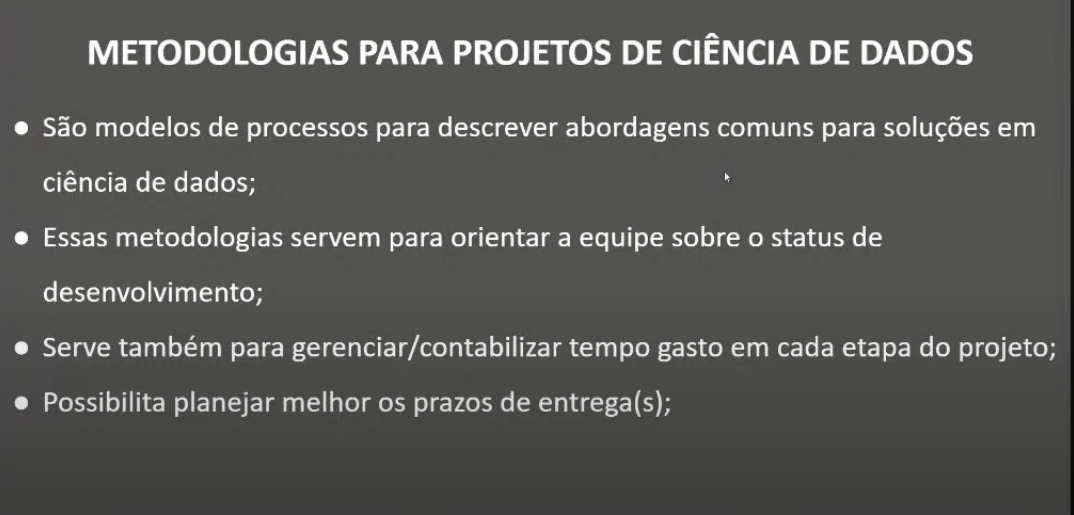

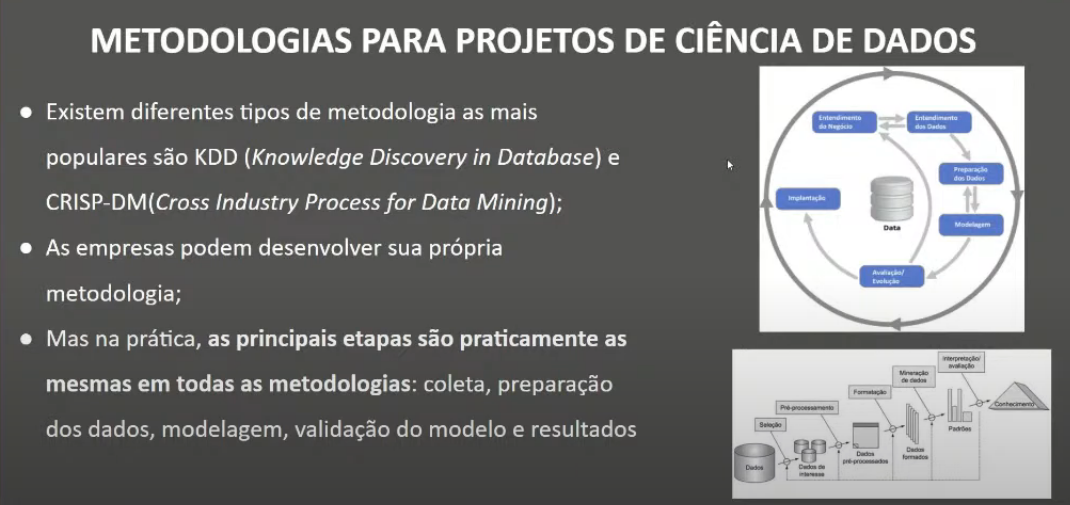

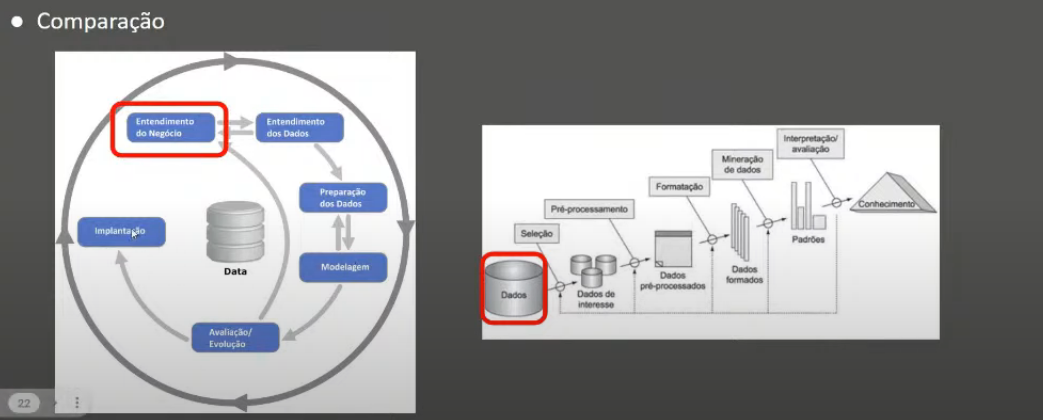

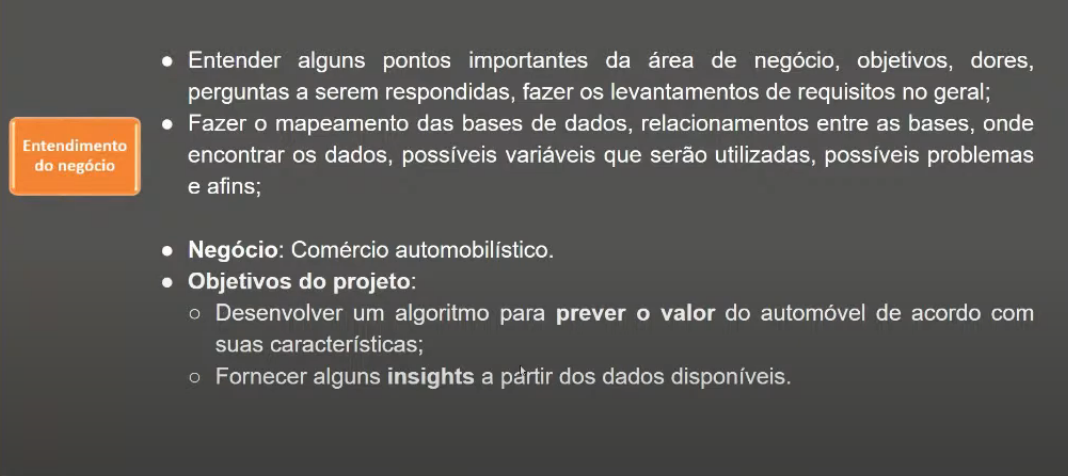

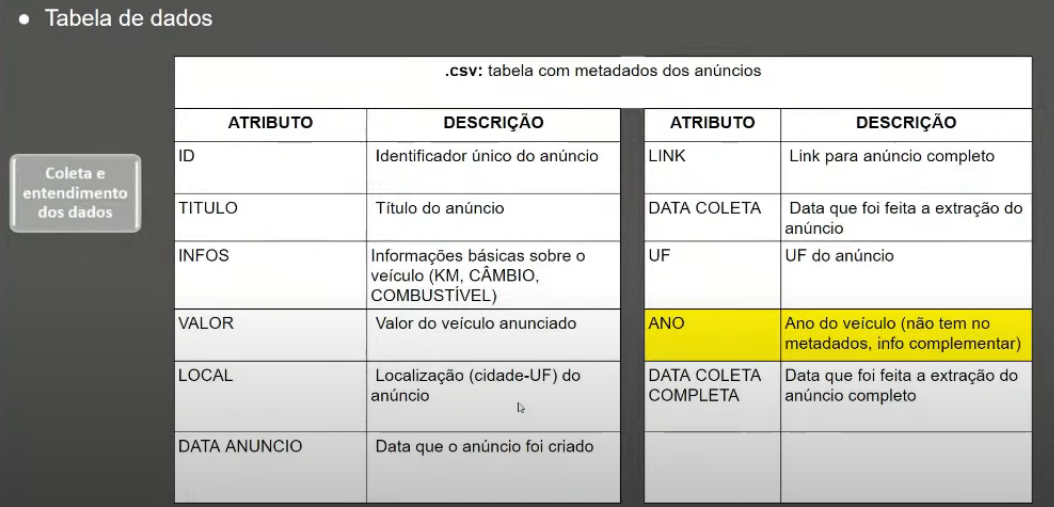

## Limpando os dados

In [94]:
df_metadados

id                                             titulo  \
0   1034435718  HB20S 2019/2019 1.6 COMFORT PLUS 16V FLEX 4P A...   
1   1039795283           Mitsubish ASX 2018 top de linha com teto   
2   1037798866  Nivus Highline 2021 5.000km Igual Zero Km !!!!...   
3   1037778276                          Hyundai hb20x automático    
4   1029668031             Chery Tiggo 5x 1.5 Vvt Turbo Iflex Txs   
..         ...                                                ...   
45  1033504574        FORD KA 2019/2020 1.5 TI-VCT FLEX SE MANUAL   
46  1032384742            Corolla Xei 2007 apenas 139km original.   
47  1029829333                                Vendo Apolo GLS 89    
48   456258804           Peugeot 408 Business 1.6 Thp automático    
49  1025661141                     New Tucson 1.6 GLS Turbo 21/22   

                                                infos       valor  \
0      53.527 km  |  Câmbio: Automático  |  Flex  |     R$ 74.220   
1      34.000 km  |  Câmbio: Automático  |  Flex  |    R$ 115.000   
2       5.000 km  |  Câmbio: Automático  |  Flex  |    R$ 126.500   
3      61.000 km  |  Câmbio: Automático  |  Flex  |     R$ 55.900   
4      31.285 km  |  Câmbio: Automático  |  Flex  |    R$ 106.990   
..                                                ...         ...   
45         75.412 km  |  Câmbio: Manual  |  Flex  |     R$ 58.900   
46  139.500 km  |  Câmbio: Automático  |  Gasolina...   R$ 38.500   
47    145.000 km  |  Câmbio: Manual  |  Gasolina  |     R$ 13.500   
48     68.000 km  |  Câmbio: Automático  |  Flex  |     R$ 59.900   
49      0 km  |  Câmbio: Automático  |  Gasolina  |    R$ 175.000   

                         local data_anuncio  \
0               São Luís -  MA  Hoje, 17:58   
1         Rio de Janeiro -  RJ  Hoje, 17:58   
2   Conselheiro Lafaiete -  MG  Hoje, 17:54   
3                Chapecó -  SC  Hoje, 17:53   
4         Rio de Janeiro -  RJ  Hoje, 17:53   
..                         ...          ...   
45                Maceió -  AL  Hoje, 15:51   
46                Osasco -  SP  Hoje, 15:51   
47           Nova Iguaçu -  RJ  Hoje, 15:51   
48        Rio de Janeiro -  RJ  Hoje, 15:51   
49           Sete Lagoas -  MG  Hoje, 15:51   

                                                 link DATA_COLETA_METADADOS  
0   https://ma.olx.com.br/regiao-de-sao-luis/autos...            2022-06-01  
1   https://rj.olx.com.br/rio-de-janeiro-e-regiao/...            2022-06-01  
2   https://mg.olx.com.br/belo-horizonte-e-regiao/...            2022-06-01  
3   https://sc.olx.com.br/oeste-de-santa-catarina/...            2022-06-01  
4   https://rj.olx.com.br/rio-de-janeiro-e-regiao/...            2022-06-01  
..                                                ...                   ...  
45  https://al.olx.com.br/alagoas/autos-e-pecas/ca...            2022-06-01  
46  https://sp.olx.com.br/sao-paulo-e-regiao/autos...            2022-06-01  
47  https://rj.olx.com.br/rio-de-janeiro-e-regiao/...            2022-06-01  
48  https://rj.olx.com.br/rio-de-janeiro-e-regiao/...            2022-06-01  
49  https://mg.olx.com.br/belo-horizonte-e-regiao/...            2022-06-01  

[4950 rows x 8 columns]

In [96]:
df_metadados_limpos = df_metadados.drop_duplicates(subset=['id'])
df_metadados_limpos.reset_index(inplace=True,drop=True)
print(df_metadados_limpos.shape)

(4289, 8)


In [ ]:
# PS: Poderíamos continuar limpando os dados a partir desse df criado, mas como o ano do carro
# não está bem definido e o escopo do curso não cobre essa parte de como podemos extrair esses dados
# então utilizarei os dados do próprio professor, pois ele disponibiliza os dados com os anos.